## Прогнозирование валютного курса USD/RUB

In [2]:
install.packages('vars')

also installing the dependencies 'strucchange', 'urca', 'lmtest', 'sandwich'



package 'strucchange' successfully unpacked and MD5 sums checked
package 'urca' successfully unpacked and MD5 sums checked
package 'lmtest' successfully unpacked and MD5 sums checked
package 'sandwich' successfully unpacked and MD5 sums checked
package 'vars' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Temp\Rtmpwz4Vbx\downloaded_packages


In [89]:
install.packages('fGarch')

also installing the dependencies 'gss', 'stabledist', 'timeSeries', 'fBasics', 'fastICA'



package 'gss' successfully unpacked and MD5 sums checked
package 'stabledist' successfully unpacked and MD5 sums checked
package 'timeSeries' successfully unpacked and MD5 sums checked
package 'fBasics' successfully unpacked and MD5 sums checked
package 'fastICA' successfully unpacked and MD5 sums checked
package 'fGarch' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Temp\Rtmpwz4Vbx\downloaded_packages


In [242]:
install.packages('xlsx')

also installing the dependencies 'rJava', 'xlsxjars'




  There is a binary version available but the source version is later:
      binary source needs_compilation
rJava 0.9-11 0.9-12              TRUE

  Binaries will be installed
package 'rJava' successfully unpacked and MD5 sums checked
package 'xlsxjars' successfully unpacked and MD5 sums checked
package 'xlsx' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Temp\Rtmpwz4Vbx\downloaded_packages


In [115]:
install.packages('tseries')

package 'tseries' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'tseries'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"проблема с копированием C:\Anaconda3\envs\Note\Lib\R\library\00LOCK\tseries\libs\x64\tseries.dll в C:\Anaconda3\envs\Note\Lib\R\library\tseries\libs\x64\tseries.dll: Permission denied"Warning message:
"restored 'tseries'"


The downloaded binary packages are in
	C:\Temp\Rtmpwz4Vbx\downloaded_packages


In [5]:
install.packages('forecast')

also installing the dependencies 'quadprog', 'fracdiff', 'tseries', 'RcppArmadillo'



package 'quadprog' successfully unpacked and MD5 sums checked
package 'fracdiff' successfully unpacked and MD5 sums checked
package 'tseries' successfully unpacked and MD5 sums checked
package 'RcppArmadillo' successfully unpacked and MD5 sums checked
package 'forecast' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Temp\Rtmpwz4Vbx\downloaded_packages


In [34]:
install.packages('QuantTools')

also installing the dependencies 'bitops', 'fasttime', 'RCurl'



package 'bitops' successfully unpacked and MD5 sums checked
package 'fasttime' successfully unpacked and MD5 sums checked
package 'RCurl' successfully unpacked and MD5 sums checked
package 'QuantTools' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Temp\Rtmpwz4Vbx\downloaded_packages


In [6]:
library(vars)
library(xts)
library(forecast)
library(quantmod)

Warning message:
"package 'forecast' was built under R version 3.6.3"Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Loading required package: TTR
Version 0.4-0 included new data defaults. See ?getSymbols.


In [116]:
library(tseries)

Warning message:
"package 'tseries' was built under R version 3.6.3"

In [35]:
library(QuantTools)

Warning message:
"package 'QuantTools' was built under R version 3.6.3"Loading required package: data.table

Attaching package: 'data.table'

The following objects are masked from 'package:xts':

    first, last



In [90]:
library(fGarch)

Warning message:
"package 'fGarch' was built under R version 3.6.3"Loading required package: timeDate
Loading required package: timeSeries
Warning message:
"package 'timeSeries' was built under R version 3.6.3"
Attaching package: 'timeSeries'

The following object is masked from 'package:QuantTools':

    returns

The following object is masked from 'package:zoo':

    time<-

Loading required package: fBasics
Warning message:
"package 'fBasics' was built under R version 3.6.3"
Attaching package: 'fBasics'

The following object is masked from 'package:TTR':

    volatility



#### Взятая из чьего-то ГитХаба функция, которая позволяет выбрать лучшую ARMA+GARCH модель:

In [130]:
garchAutoTryFit = function(
   ll,
   data,
   trace=FALSE,
   forecast.length=1,
   with.forecast=TRUE,
   ic="AIC",
   garch.model="garch" )
{
   formula = as.formula( paste( sep="",
                                "~ arma(", ll$order[1], ",", ll$order[2], ")+",
                                garch.model,
                                "(", ll$order[3], ",", ll$order[4], ")" ) )
   fit = tryCatch( garchFit( formula=formula,
                             data=data,
                             trace=FALSE,
                             cond.dist=ll$dist ),
                   error=function( err ) TRUE,
                   warning=function( warn ) FALSE )

   pp = NULL

   if( !is.logical( fit ) ) {
      if( with.forecast ) {
         pp = tryCatch( predict( fit,
                                 n.ahead=forecast.length,
                                 doplot=FALSE ),
                        error=function( err ) FALSE,
                        warning=function( warn ) FALSE )
         if( is.logical( pp ) ) {
            fit = NULL
         }
      }
   } else {
      fit = NULL
   }

   if( trace ) {
      if( is.null( fit ) ) {
         cat( paste( sep="",
                     "   Analyzing (", ll$order[1], ",", ll$order[2],
                                    ",", ll$order[3], ",", ll$order[4], ") with ",
                                    ll$dist, " distribution done.",
                     "Bad model.\n" ) )
      } else {
         if( with.forecast ) {
            cat( paste( sep="",
                        "   Analyzing (", ll$order[1], ",", ll$order[2], ",",
                                          ll$order[3], ",", ll$order[4], ") with ",
                                          ll$dist, " distribution done.",
                        "Good model. ", ic, " = ", round(fit@fit$ics[[ic]],6),
                        ", forecast: ",
                        paste( collapse=",", round(pp[,1],4) ), "\n" ) )
         } else {
            cat( paste( sep="",
                        "   Analyzing (", ll[1], ",", ll[2], ",", ll[3], ",", ll[4], ") with ",
                                          ll$dist, " distribution done.",
                        "Good model. ", ic, " = ", round(fit@fit$ics[[ic]],6), "\n" ) )
         }
      }
   }

   return( fit )
}

garchAuto = function(
   xx,
   min.order=c(0,0,1,1),
   max.order=c(5,5,1,1),
   trace=FALSE,
   cond.dists="sged",
   with.forecast=TRUE,
   forecast.length=1,
   arma.sum=c(0,1e9),
   cores=1,
   ic="AIC",
   garch.model="garch" )
{
   require( fGarch )
   require( parallel )

   len = NROW( xx )

   models = list( )

   for( dist in cond.dists )
   for( p in min.order[1]:max.order[1] )
   for( q in min.order[2]:max.order[2] )
   for( r in min.order[3]:max.order[3] )
   for( s in min.order[4]:max.order[4] )
   {
      pq.sum = p + q
      if( pq.sum <= arma.sum[2] && pq.sum >= arma.sum[1] )
      {
         models[[length( models ) + 1]] = list( order=c( p, q, r, s ), dist=dist )
      }
   }

   res = mclapply( models,
                   garchAutoTryFit,
                   data=xx,
                   trace=trace,
                   ic=ic,
                   garch.model=garch.model,
                   forecast.length=forecast.length,
                   with.forecast=TRUE,
                   mc.cores=cores )

   best.fit = NULL

   best.ic = 1e9
   for( rr in res )
   {
      if( !is.null( rr ) )
      {
         current.ic = rr@fit$ics[[ic]]
         if( current.ic < best.ic )
         {
            best.ic = current.ic
            best.fit = rr
         }
      }
   }

   if( best.ic < 1e9 )
   {
      return( best.fit )
   }

   return( NULL )
}

In [38]:
quant_tools_to_xts <- function(df, ...){
    df <- as.data.frame(df) 
    #df$date = as.Date(df$date) 
    ts = xts(df[,-1], order.by = df[,1]) 
    return(ts) }

#### Скачиваю данные с финама

In [131]:
USDRUB <- get_finam_data('USDRUB',  from = '2015-01-01', to = Sys.Date())

In [132]:
USDRUB <- quant_tools_to_xts(USDRUB) 

In [133]:
adf.test(USDRUB$close)


	Augmented Dickey-Fuller Test

data:  USDRUB$close
Dickey-Fuller = -1.83, Lag order = 12, p-value = 0.6503
alternative hypothesis: stationary


#### Ряд (ожидаемо) нестационарен, будем делать его стационарным 

In [136]:
USDRUB.rtn <- diff(log(USDRUB$close))[-1,] #сразу первую строку, в которой будет NA 

In [137]:
adf.test(USDRUB.rtn)

Warning message in adf.test(USDRUB.rtn):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  USDRUB.rtn
Dickey-Fuller = -11.058, Lag order = 12, p-value = 0.01
alternative hypothesis: stationary


#### Далее работаем со стационарным рядом 

In [180]:
m1 <- garchAuto(USDRUB.rtn, with.forecast = TRUE, forecast.length = 10)

In [197]:
predict(m1)

ERROR: Error in a_vec[(i - 1):(i - u2)]: только нули могут смешиваться с отрицательными индексами


#### Такая функция занимает немало времени, потому что она строит большое количество моделей и потом выбирает лучшую по критерию Акаике


#### Такие модели не умеют давать долгосрочный прогноз, поэтому напишем цикл, который бы делал прогноз на каждый последующий день, причем каждый раз обновляя тренировочную выборку реальным значения лог-доходности курса. Иными словами, мы не продолжаем строить модель с учетом предсказанного значения, а заменяем его реальным и получаем прогноз на следющий день 

In [201]:
n <- nrow(USDRUB.rtn) #объем всей выборки
k <- NULL
k <- as.data.frame(k) #cоздал дата-фрейм, в который буду "складывать" свои краткосрочные прогнозы
b <- 100 #количество дней, на которое делаем прогноз
n1 <- (n-b+1)
for (i in n1:n) #так как цикл учитывает первое и последнее значения в скобках, то интервал i будет именно такой 
    {
    train <- USDRUB.rtn[-c(i:n),] #дополняем каждый раз нашу тренировочную выборку
    m1 <- garchAuto(train, with.forecast = TRUE, forecast.length = 10) #каждый раз выбирает лучшую модель
    k[(i-n1+1),1] <- as.numeric(predict(m1)[1,1]) #записываем прогнозы по очереди в наш дата-фрейм
    }

In [210]:
c <- cbind(USDRUB.rtn[n1:n], k$V1) #объединим реальные значения и предсказанные 
# c$k.V1 <- c$k.V1*sd(ALL1$N225.Adjusted[-c((1:(n-300)),(n-149):n)])/sd(c$k.V1) 
# Есть еще такой финт, что мы делаем СКО на прогнозе такой же, как и на самом временном ряду 
colnames(c)<- c('REAL', 'PRED') #для удобства переименуем столбцы

#### Когда речь идет о прогнозировании валютного курса, неважно абсолютное его значение, как именно изменение, которое с ним произойдет. Поэтому посчитаю куммулятивную лог-доходность и посмотрю на график

In [211]:
p <- NULL
p <- as.data.frame(p) #пустой фрейм для не
p[1,1] <- USDRUB$close[(n1)] #реальные значения курса
p[1,2] <- USDRUB$close[(n1)]

In [212]:
c <- exp(c)
colnames(p) <- c('REAL' , 'PRED')
data <- rbind(p, c)

In [214]:
data

REAL,PRED,V3,V4
53.23530,53.2353,NA,NA
53.16235,53.2325,0,0
53.06787,53.16155,0,0
52.87162,53.06391,0,0
52.74492,52.88246,0,0
52.70600,52.75317,0,0
52.74741,52.70769,1,0
52.58180,52.74615,0,1
52.58180,52.59249,0,0
52.40666,52.57909,0,0


In [213]:
rownames(data) <- NULL
data <- as.data.frame(data)
data$REAL <- cumprod(data$REAL) #тут, грубо говоря, перехожу обратно с абсолютным значениям
for (i in 1:b)
    {data$PRED[i+1] <- as.numeric(as.numeric(data[(i+1),2])*as.numeric(data[i,1]))
} #прогнозы в абсолютных значениях
for (i in 2:(b+1)) { 
    data[i,3] <- as.numeric(data[i,1]>as.numeric(data[(i-1),1]))
    } #увеличилось ли курс на следующий день?
for (i in 2:151) { 
    data[i,4] <- as.numeric(data[i,2]>as.numeric(data[(i-1),2]))
    } #прогноз предсказывал увеличение курса на следующий день?

ERROR: Error in eval(expr, envir, enclos): объект (список) не может быть преобразован в тип 'double'


In [216]:
data <- data[-1,] #удалим обратно строчку абсолютных значений, которую мы добавляли до этого 

In [218]:
data[,5] <- as.numeric(data$V3==data$V4) #прогноз угадал? 
sum(data$V5)/nrow(data) #доля угаданных движений курса

[1] 0.51

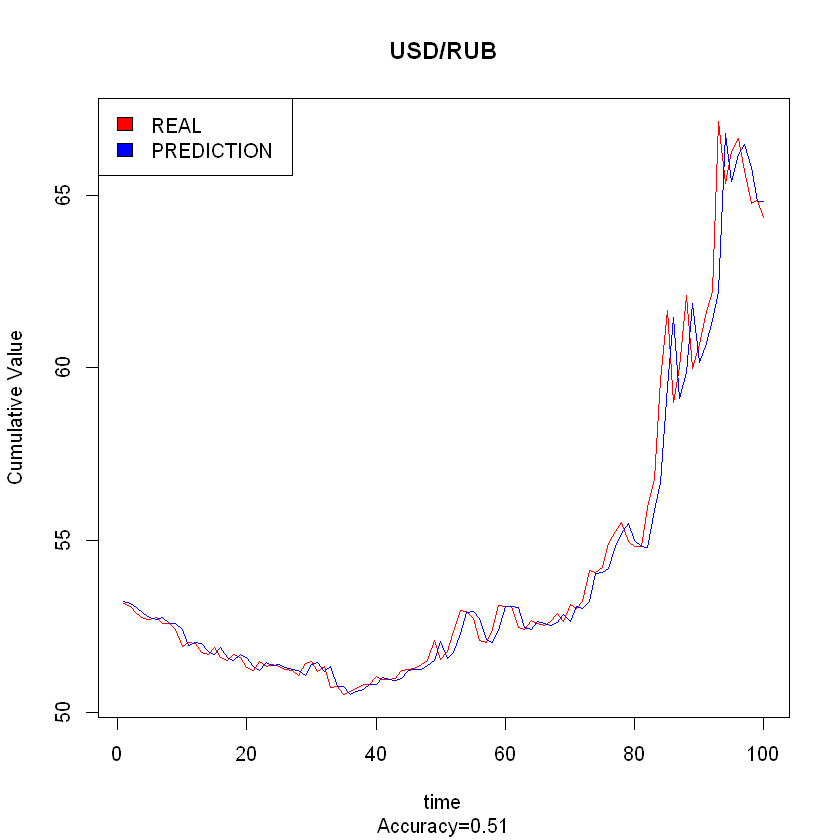

In [219]:
plot(data$REAL, x = index(data$REAL),t = 'l', col ='red', main = 'USD/RUB',
     sub = paste0('Accuracy=', sum(data$V5)/nrow(data)), xlab = 'time', ylab='Cumulative Value' )
lines(data$PRED, x = index(data$PRED),col = 'blue')
legend("topleft", c("REAL","PREDICTION"), fill=c("red","blue"))

#### Как видно на графике, модель нам предсказывала такую же лог-доходность, которая была в последний день. Иными словами, получаем прогноз no change. Значит, скорее всего, есть какой-то определяющий фактор для курса.Теперь попробуем VAR модель 

In [221]:
BRENT <- get_finam_data('ICE.BRN',  from = '2015-01-01', to = Sys.Date())

In [223]:
BRENT <- quant_tools_to_xts(BRENT)

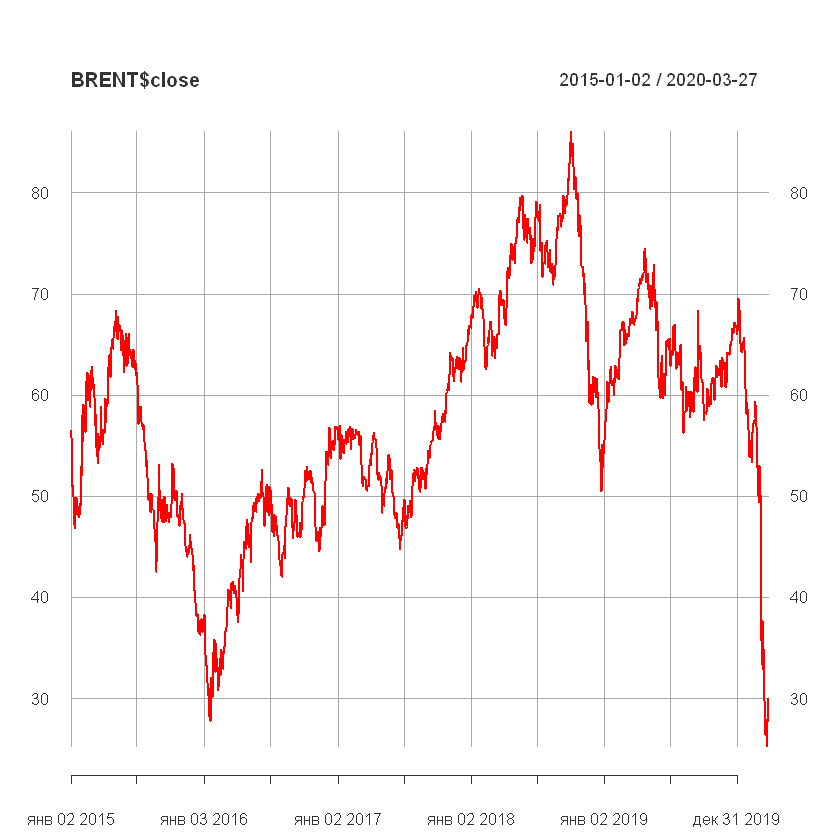

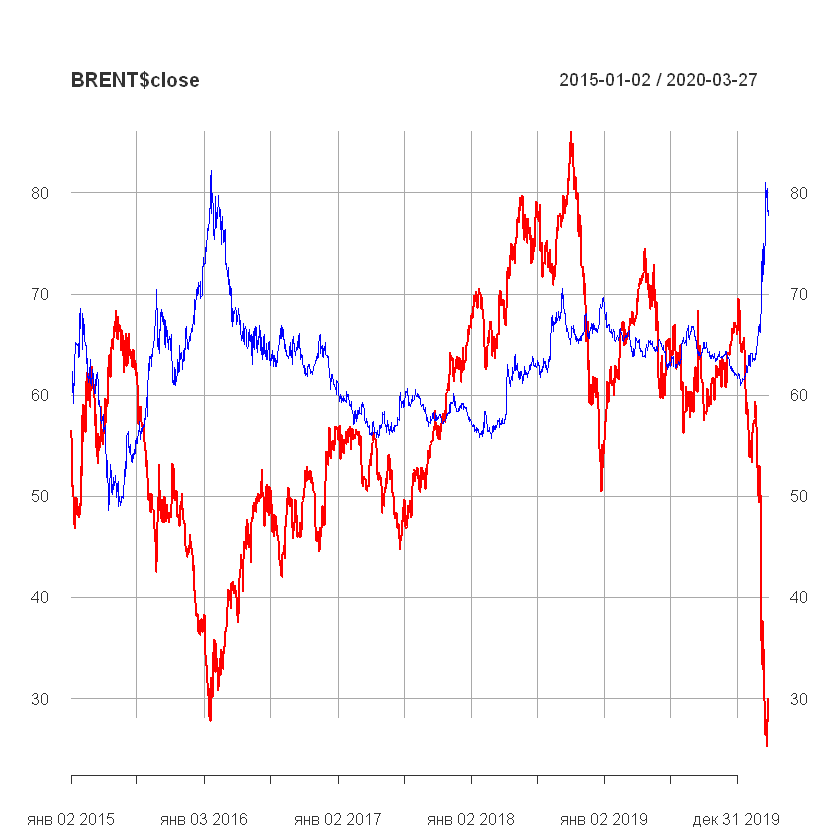

In [230]:
plot(x = BRENT$close, col = 'red')
lines( x = USDRUB$close, col = 'blue')

In [231]:
adf.test(BRENT$close)


	Augmented Dickey-Fuller Test

data:  BRENT$close
Dickey-Fuller = -1.1667, Lag order = 11, p-value = 0.9118
alternative hypothesis: stationary


In [232]:
BRENT.rtn <- diff(log(BRENT$close))[-1,]

In [233]:
adf.test(BRENT.rtn)

Warning message in adf.test(BRENT.rtn):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  BRENT.rtn
Dickey-Fuller = -9.75, Lag order = 11, p-value = 0.01
alternative hypothesis: stationary


#### Также нужно закачать ставку межбанковского кредитования рассчитаную на один день, сделаем это ручную.
#### P.S. На сайте ЦБ нашел несколько факторов, у которых возможно была бы какая-нибудь предсказательная сила для курса. Попроубем "нащупать" такую связь.

In [280]:
install.packages('readxl')

package 'readxl' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Temp\Rtmpwz4Vbx\downloaded_packages


In [281]:
library(readxl)

Warning message:
"package 'readxl' was built under R version 3.6.3"

In [428]:
cbr <- read_xlsx('cbr.xlsx', col_types = c('text', 'numeric', 'numeric', 'numeric', 'numeric',
                                          'numeric', 'numeric', 'numeric', 'numeric'))

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting numeric in E19 / R19C5: got 'вЂ”'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting numeric in I19 / R19C9: got 'вЂ”'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting numeric in E24 / R24C5: got 'вЂ”'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting numeric in I24 / R24C9: got 'вЂ”'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting numeric in C27 / R27C3: got 'вЂ”'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting numeric in G27 / R27C7: got 'вЂ”'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting numeric in E30 / R30C5: got 'вЂ”'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i 

"Expecting numeric in E68 / R68C5: got 'вЂ”'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting numeric in I68 / R68C9: got 'вЂ”'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting numeric in E69 / R69C5: got 'вЂ”'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting numeric in I69 / R69C9: got 'вЂ”'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting numeric in E70 / R70C5: got 'вЂ”'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting numeric in I70 / R70C9: got 'вЂ”'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting numeric in E71 / R71C5: got 'вЂ”'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting numeric in I71 / R71C9: got 'вЂ”'"Warning message in read_fun(pat

"Expecting numeric in E108 / R108C5: got 'вЂ”'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting numeric in I108 / R108C9: got 'вЂ”'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting numeric in C110 / R110C3: got 'вЂ”'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting numeric in G110 / R110C7: got 'вЂ”'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting numeric in E111 / R111C5: got 'вЂ”'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting numeric in I111 / R111C9: got 'вЂ”'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting numeric in E113 / R113C5: got 'вЂ”'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting numeric in I113 / R113C9: got 'вЂ”'"Warning message

"Expecting numeric in I205 / R205C9: got 'вЂ”'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting numeric in E206 / R206C5: got 'вЂ”'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting numeric in I206 / R206C9: got 'вЂ”'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting numeric in C209 / R209C3: got 'вЂ”'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting numeric in G209 / R209C7: got 'вЂ”'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting numeric in E222 / R222C5: got 'вЂ”'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting numeric in I222 / R222C9: got 'вЂ”'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting numeric in E229 / R229C5: got 'вЂ”'"Warning message

"Expecting numeric in C445 / R445C3: got 'вЂ”'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting numeric in G445 / R445C7: got 'вЂ”'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting numeric in C455 / R455C3: got 'вЂ”'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting numeric in G455 / R455C7: got 'вЂ”'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting numeric in C468 / R468C3: got 'вЂ”'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting numeric in G468 / R468C7: got 'вЂ”'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting numeric in C472 / R472C3: got 'вЂ”'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting numeric in G472 / R472C7: got 'вЂ”'"Warning message

"Expecting numeric in G879 / R879C7: got 'вЂ”'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting numeric in C939 / R939C3: got 'вЂ”'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting numeric in G939 / R939C7: got 'вЂ”'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting numeric in C963 / R963C3: got 'вЂ”'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting numeric in G963 / R963C7: got 'вЂ”'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting numeric in C1012 / R1012C3: got 'вЂ”'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting numeric in G1012 / R1012C7: got 'вЂ”'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting numeric in C1043 / R1043C3: got 'вЂ”'"Warning m

In [429]:
cbr$Date <- as.Date(cbr$Date, format = "%d.%m.%Y")

#### В таблице есть пропуски, заменю их предыдущими значениями 

In [430]:
n3 <- nrow(cbr)
n4 <- ncol(cbr)
for (i in 1:n3) {
    for (j in 2:n4) {
        if (is.na(cbr[i,j]) == TRUE) {
            cbr[i,j] <- as.numeric(cbr[(i-1),j]) #так как в фрейме от новых к старым данные
        }
    }
}

In [431]:
cbr

Date,MIACR,MIACR_USD,MIACR_IG,MIACR_B,MIACR_vol,MIACR_USD_vol,MIACR_IG_vol,MIACR_B_vol
2020-03-25,5.90,0.16,5.82,6.00,253425.3,2456.16,153696,6520
2020-03-24,5.95,0.21,5.93,5.93,247669.0,2911.12,148112,6400
2020-03-23,5.90,0.16,5.82,5.86,240310.7,3827.17,131728,7960
2020-03-20,5.85,0.10,5.84,6.08,254468.8,5247.85,167000,9520
2020-03-19,5.68,0.23,5.65,5.93,188198.2,4289.71,115040,14436
2020-03-18,5.47,0.53,5.45,5.60,208847.0,6597.15,150188,4360
2020-03-17,5.35,0.80,5.29,5.50,213950.4,5319.73,136748,13760
2020-03-16,5.37,0.92,5.25,5.50,285353.8,5213.93,141400,15412
2020-03-13,5.35,1.09,5.26,5.53,236000.0,6754.82,108640,11300
2020-03-12,5.65,1.09,5.64,5.68,265701.2,6785.80,180792,9120


In [432]:
cbr <- quant_tools_to_xts(cbr)

In [433]:
cbr <- diff(log(cbr))

In [434]:
colnames(USDRUB.rtn) <- 'USDRUB'

In [435]:
colnames(BRENT.rtn) <- 'BRENT'

In [494]:
for_VAR <- merge(USDRUB.rtn, BRENT.rtn, cbr)

In [495]:
for_VAR <- for_VAR[-c(1:11,1876:1877)]

In [496]:
for_VAR[is.na(for_VAR)] <- 0 

In [497]:
library(vars)

In [498]:
n5 <- nrow(for_VAR)
k1 <- NULL
k1 <- as.data.frame(k1)
b1 <- 150
n6 <- n5-b1+1
for (i in n6:n5) {
    train <- for_VAR[-c(i:n),]
    m3 <- VAR(train, lag.max = 10, ic = 'AIC')
    a3 <- predict(m3)
    k1[(i-n6+1),1] <- as.numeric(a3$fcst$USDRUB[1,1])
}

In [506]:
summary(m3)


VAR Estimation Results:
Endogenous variables: USDRUB, BRENT, MIACR_B 
Deterministic variables: const 
Sample size: 1859 
Log Likelihood: 15848.121 
Roots of the characteristic polynomial:
0.5281 0.5281 0.5184 0.5184 0.5061 0.5061  0.49  0.49 0.4528 0.4528 0.4199 0.4199
Call:
VAR(y = train, lag.max = 10, ic = "AIC")


Estimation results for equation USDRUB: 
USDRUB = USDRUB.l1 + BRENT.l1 + MIACR_B.l1 + USDRUB.l2 + BRENT.l2 + MIACR_B.l2 + USDRUB.l3 + BRENT.l3 + MIACR_B.l3 + USDRUB.l4 + BRENT.l4 + MIACR_B.l4 + const 

             Estimate Std. Error t value Pr(>|t|)    
USDRUB.l1  -0.1646743  0.0264172  -6.234 5.63e-10 ***
BRENT.l1   -0.0478263  0.0129904  -3.682 0.000238 ***
MIACR_B.l1  0.0381098  0.0141356   2.696 0.007081 ** 
USDRUB.l2  -0.0455225  0.0266693  -1.707 0.088004 .  
BRENT.l2    0.0097457  0.0130609   0.746 0.455657    
MIACR_B.l2 -0.0176354  0.0141711  -1.244 0.213488    
USDRUB.l3  -0.0319292  0.0266865  -1.196 0.231672    
BRENT.l3   -0.0233916  0.0130942  -1.786 0.074

In [499]:
c <- cbind(as.data.frame(for_VAR$USDRUB[n6:n5]), k1$V1)
row.names(c) <- NULL 
colnames(c)<- c('REAL', 'PRED')
l <- -c(n6:n5)
# c$PRED <- c$PRED*sd(for_VAR$USDRUB[l])/sd(c$PRED)
p <- NULL
p <- as.data.frame(p)
p[1,1] <- USDRUB$close[n6]
p[1,2] <- USDRUB$close[n6]
c <- exp(c)
colnames(p) <- c('REAL' , 'PRED')
blin <- rbind(p, c)
rownames(blin) <- NULL

In [500]:
blin <- as.data.frame(blin)
blin$REAL <- cumprod(blin$REAL)
blin <- as.data.frame(blin)
for (i in 1:150)
    {blin$PRED[i+1] <- as.numeric(as.numeric(blin[(i+1),2])*as.numeric(blin[i,1]))
}

blin <- as.data.frame(blin)

In [501]:
blin <- as.data.frame(blin)
for (i in 2:151) { 
 
    blin[i,3] <- as.numeric(blin[i,1]>as.numeric(blin[(i-1),1]))
    
    }
for (i in 2:151) { 
 
    blin[i,4] <- as.numeric(blin[i,2]>as.numeric(blin[(i-1),2]))
    
    }


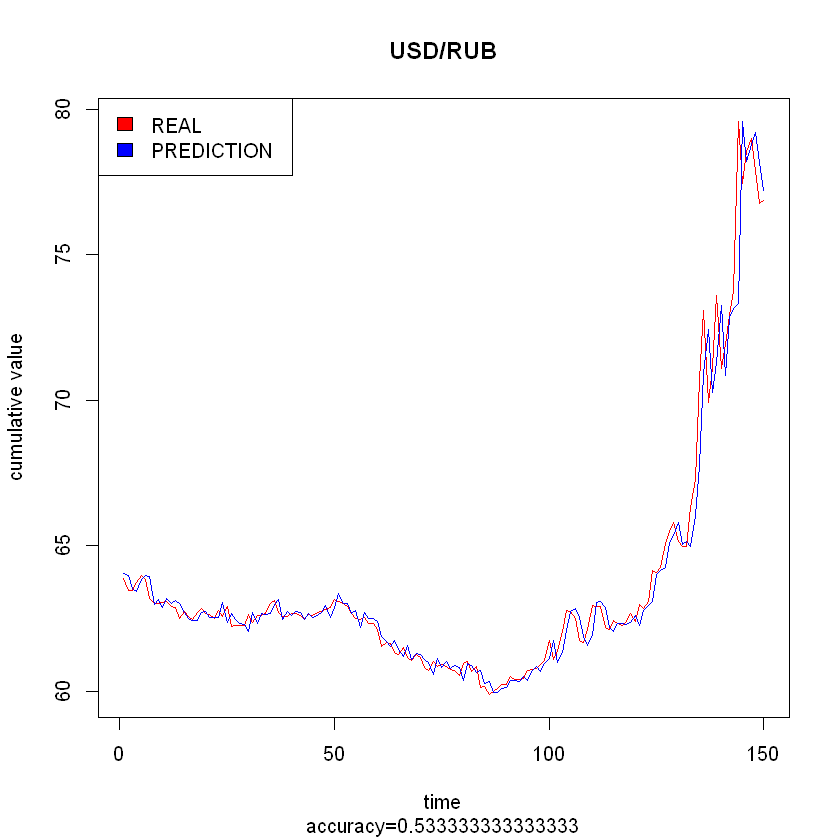

In [502]:
blin <- blin[-1,]
blin[,5] <- as.numeric(blin$V3==blin$V4)
blin$V4 <- as.numeric(blin$V4)
rownames(blin) <- NULL
blin[1,6] <- 0


plot(blin$REAL, x = index(blin$REAL),t = 'l', col ='red', main = 'USD/RUB',
     sub = paste0('accuracy=', sum(blin$V5)/nrow(blin)), xlab = 'time', ylab='cumulative value' )
lines(blin$PRED, x = index(blin$PRED),col = 'blue')
legend("topleft", c("REAL","PREDICTION"), fill=c("red","blue"))

##### Мы попробовали не выкидывать незначимые факторы, теперь попробуем их выкинуть

In [503]:
for_VAR$MIACR_IG <- NULL
for_VAR$MIACR_vol <- NULL 
for_VAR$MIACR_USD_vol <- NULL 
for_VAR$MIACR_IG_vol <- NULL 
for_VAR$MIACR_B_vol <- NULL
for_VAR$MIACR <- NULL 
for_VAR$MIACR_USD <- NULL

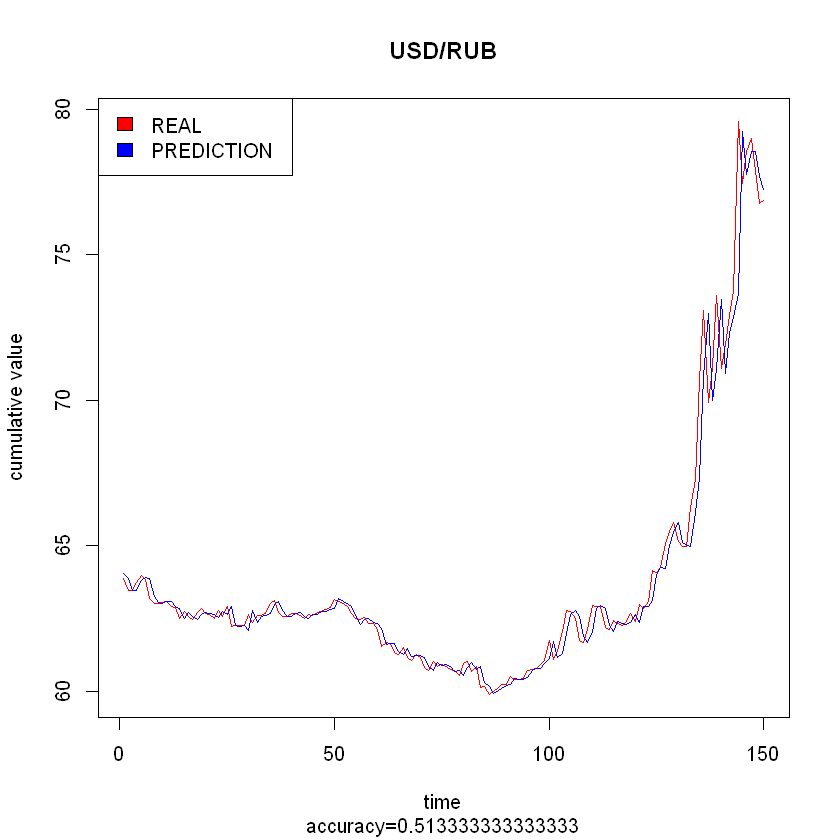

In [504]:
n5 <- nrow(for_VAR)
k1 <- NULL
k1 <- as.data.frame(k1)
b1 <- 150
n6 <- n5-b1+1
for (i in n6:n5) {
    train <- for_VAR[-c(i:n),]
    m3 <- VAR(train, lag.max = 10, ic = 'AIC')
    a3 <- predict(m3)
    k1[(i-n6+1),1] <- as.numeric(a3$fcst$USDRUB[1,1])
}
c <- cbind(as.data.frame(for_VAR$USDRUB[n6:n5]), k1$V1)
# c.V1 <- c$k1.V1*sd(for_VAR$USDRUB[-с(n6:n5)]/sd(c$k1.V1)
colnames(c)<- c('REAL', 'PRED')
row.names(c) <- NULL 
p <- NULL
p <- as.data.frame(p)
p[1,1] <- USDRUB$close[n6]
p[1,2] <- USDRUB$close[n6]
c <- exp(c)
colnames(p) <- c('REAL' , 'PRED')
blin <- rbind(p, c)
rownames(blin) <- NULL
blin <- as.data.frame(blin)
blin$REAL <- cumprod(blin$REAL)
blin <- as.data.frame(blin)
for (i in 1:150)
    {blin$PRED[i+1] <- as.numeric(as.numeric(blin[(i+1),2])*as.numeric(blin[i,1]))
}

blin <- as.data.frame(blin)
blin <- as.data.frame(blin)
for (i in 2:151) { 
 
    blin[i,3] <- as.numeric(blin[i,1]>as.numeric(blin[(i-1),1]))
    
    }
for (i in 2:151) { 
 
    blin[i,4] <- as.numeric(blin[i,2]>as.numeric(blin[(i-1),2]))
    
    }
blin <- blin[-1,]
blin[,5] <- as.numeric(blin$V3==blin$V4)
blin$V4 <- as.numeric(blin$V4)
rownames(blin) <- NULL
blin[1,6] <- 0


plot(blin$REAL, x = index(blin$REAL),t = 'l', col ='red', main = 'USD/RUB',
     sub = paste0('accuracy=', sum(blin$V5)/nrow(blin)), xlab = 'time', ylab='cumulative value' )
lines(blin$PRED, x = index(blin$PRED),col = 'blue')
legend("topleft", c("REAL","PREDICTION"), fill=c("red","blue"))

#### Таким образом, все построенные нами модели получились не очень, все прогнозы во многом получились " no change". Дело в том, что день - слишком большой горизонт прогноза. По идее, такие модели можно применять использую минутный и часовые данные. 